In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()

In [3]:
def bench(n=2**20, q=2**20, source='std'):
    !make -s {source}
    if _exit_code != 0:
        raise Exception("Compilation failed")
    res = !./{source} {n} {q}
    #res = !g++ -O3 -march=native -D N={n} -D Q={q} {source} -o run && ./run
    duration = float(res[0].split()[0])
    check = int(res[1])
    print(f'{source:>18} {n:<7} {q:<7} {check:10} {duration}')
    return duration

ns = list(int(1.17**k) for k in range(30, 60))

In [15]:
bench(source='textbook', n=2**24)
bench(source='branchless', n=2**24)
bench(source='branchless-prefetch', n=2**24)
bench(source='branchless-drop-in', n=2**24)

          textbook 16777216 1048576 1448891158 1062.35
        branchless 16777216 1048576 1448891158 1053.04
branchless-prefetch 16777216 1048576 1448891158 897.05
branchless-drop-in 16777216 1048576 1448891158 1121.77


1121.77

In [26]:
bench(source='branchless-drop-in', n=2**12)

branchless-drop-in 4096    1048576 1600616319 112.77


112.77

In [18]:
[bench(source=source, n=2**12) for source in ['textbook', 'branchless', 'branchless-drop-in']]

          textbook 4096    1048576 1600616319 110.82
        branchless 4096    1048576 1600616319 25.5
branchless-drop-in 4096    1048576 1600616319 106.06


[110.82, 25.5, 106.06]

In [78]:
x = [bench(source='eytzinger', n=n, q=2**22) for n in ns]

         eytzinger 111     4194304 1067433874 18.45
         eytzinger 129     4194304 2084202863 18.39
         eytzinger 152     4194304 1650086489 29.17
         eytzinger 177     4194304 1093987052 32.65
         eytzinger 208     4194304  849577987 23.96
         eytzinger 243     4194304 1842022031 20.26
         eytzinger 284     4194304   24170984 27.48
         eytzinger 333     4194304 1064724685 37.1
         eytzinger 389     4194304 1049421536 31.6
         eytzinger 456     4194304 1677787291 26.09
         eytzinger 533     4194304 1381557454 26.63
         eytzinger 624     4194304  485950239 38.39
         eytzinger 730     4194304 1743435292 38.55
         eytzinger 855     4194304 1980389118 31.98
         eytzinger 1000    4194304  929098415 27.34
         eytzinger 1170    4194304 1814983758 36.08
         eytzinger 1369    4194304  683804919 45.82
         eytzinger 1602    4194304  231941320 38.85
         eytzinger 1874    4194304  926717548 32.72
         eytzi

In [74]:
y = [bench(source='eytzinger-last', n=n, q=2**22) for n in ns]

eytzinger-last.cc:30:16: warning: unknown attribute 'optimize' ignored [-Wunknown-attributes]
__attribute__((optimize("if-conversion2")))
               ^
1 warning generated.
    eytzinger-last 111     4194304 1067433874 15.09
    eytzinger-last 129     4194304 2084202863 17.47
    eytzinger-last 152     4194304 1650086489 17.47
    eytzinger-last 177     4194304 1093987052 17.47
    eytzinger-last 208     4194304  849577987 17.49
    eytzinger-last 243     4194304 1842022031 17.59
    eytzinger-last 284     4194304   24170984 21.03
    eytzinger-last 333     4194304 1064724685 20.97
    eytzinger-last 389     4194304 1049421536 20.97
    eytzinger-last 456     4194304 1677787291 20.98
    eytzinger-last 533     4194304 1381557454 23.47
    eytzinger-last 624     4194304  485950239 23.48
    eytzinger-last 730     4194304 1743435292 23.47
    eytzinger-last 855     4194304 1980389118 23.47
    eytzinger-last 1000    4194304  929098415 23.46
    eytzinger-last 1170    4194304 181498375

In [76]:
z = [bench(source='eytzinger-fill', n=n, q=2**22) for n in ns]

    eytzinger-fill 111     4194304 1067433874 16.75
    eytzinger-fill 129     4194304 2084202863 20.06
    eytzinger-fill 152     4194304 1650086489 20.12
    eytzinger-fill 177     4194304 1093987052 19.6
    eytzinger-fill 208     4194304  849577987 19.58
    eytzinger-fill 243     4194304 1842022031 19.61
    eytzinger-fill 284     4194304   24170984 22.75
    eytzinger-fill 333     4194304 1064724685 22.73
    eytzinger-fill 389     4194304 1049421536 22.73
    eytzinger-fill 456     4194304 1677787291 22.82
    eytzinger-fill 533     4194304 1381557454 26.21
    eytzinger-fill 624     4194304  485950239 26.22
    eytzinger-fill 730     4194304 1743435292 26.2
    eytzinger-fill 855     4194304 1980389118 26.2
    eytzinger-fill 1000    4194304  929098415 26.2
    eytzinger-fill 1170    4194304 1814983758 29.73
    eytzinger-fill 1369    4194304  683804919 29.69
    eytzinger-fill 1602    4194304  231941320 29.7
    eytzinger-fill 1874    4194304  926717548 29.77
    eytzinger-fil

In [82]:
mini_std = [bench(source='std', n=n, q=2**22) for n in ns]
mini_branchless = [bench(source='branchless', n=n, q=2**22) for n in ns]

               std 111     4194304 1067433874 51.11
               std 129     4194304 2084202863 55.09
               std 152     4194304 1650086489 55.99
               std 177     4194304 1093987052 57.2
               std 208     4194304  849577987 59.09
               std 243     4194304 1842022031 62.62
               std 284     4194304   24170984 66.26
               std 333     4194304 1064724685 66.61
               std 389     4194304 1049421536 69.2
               std 456     4194304 1677787291 72.14
               std 533     4194304 1381557454 74.23
               std 624     4194304  485950239 76.3
               std 730     4194304 1743435292 78.74
               std 855     4194304 1980389118 80.69
               std 1000    4194304  929098415 83.94
               std 1170    4194304 1814983758 85.88
               std 1369    4194304  683804919 90.25
               std 1602    4194304  231941320 91.8
               std 1874    4194304  926717548 93.82
               s

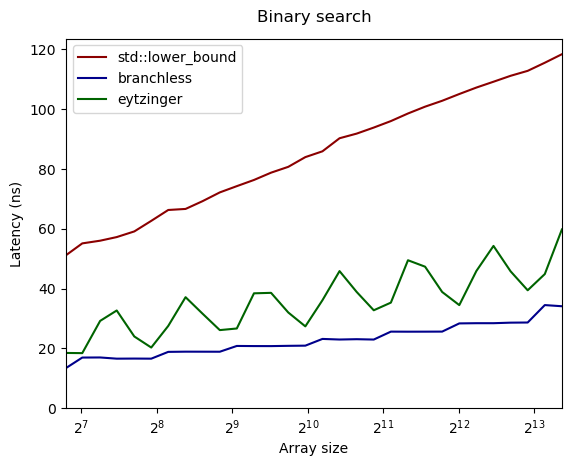

In [83]:
plt.plot(ns, mini_std, color='darkred', label='std::lower_bound')
plt.plot(ns, mini_branchless, color='darkblue', label='branchless')
plt.plot(ns, x, color='darkgreen', label='eytzinger')

plot('Binary search', 'Latency (ns)', path='bumps.svg', legend=True)

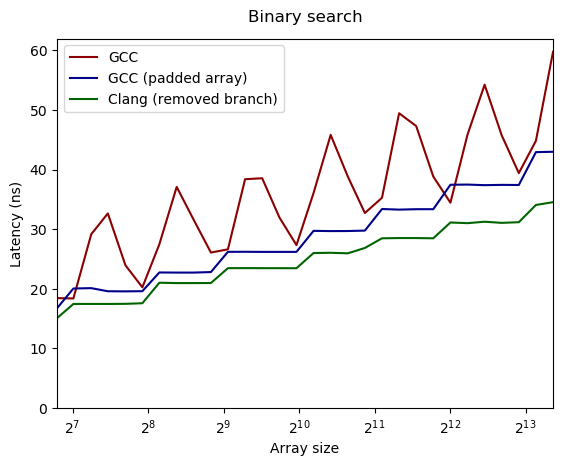

In [86]:
plt.plot(ns, x, color='darkred', label='GCC')
plt.plot(ns, z, color='darkblue', label='GCC (padded array)')
plt.plot(ns, y, color='darkgreen', label='Clang (removed branch)')

plot('Binary search', 'Latency (ns)', path='branchless-eytzinger.svg', legend=True)

In [18]:
bench(source='btree', n=2**23, q=2**22)
bench(source='btree-hugepages', n=2**23, q=2**22)

             btree 8388608 4194304  778587145 163.98
   btree-hugepages 8388608 4194304  778587145 145.46


145.46

In [31]:
#bench(n=2**10, q=2**22, source='std')
#bench(n=2**10, q=2**22, source='textbook')
bench(n=2**10, q=2**22, source='branchless')
bench(n=2**10, q=2**22, source='btree-hugepages')
bench(n=2**10, q=2**22, source='btree-unrolled')

        branchless 1024    4194304 1732687167 20.85
   btree-hugepages 1024    4194304 1732687167 25.04
btree-unrolled.cc: In function ‘int lower_bound(int)’:
btree-unrolled.cc:45:25: warning: attributes at the beginning of statement are ignored [-Wattributes]
   45 |     while (k < nblocks) [[likely]] {
      |                         ^~~~~~~~~~
    btree-unrolled 1024    4194304 1732687167 25.11


25.11

In [32]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            #plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', basex=2)
    plt.xlabel('Array size')

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc='best')

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


#plt.plot(ns, inc_res, color='darkred')
#plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

In [92]:
tasks = [
    # source, name, color
    ('std', 'std::lower_bound', 'darkred'),
    ('branchless', 'branchless', 'darkblue'),
    ('eytzinger', 'eytzinger', 'darkgreen'),
    ('eytzinger-prefetch', 'eytzinger (with prefetching)', 'orange'),
    ('btree', 'B-tree (with SIMD)', 'purple'),
    ('btree-hugepages', 'B-tree (with SIMD and huge pages)', 'cyan'),
]

#ns = [2**14, 2**15]
ns = list(int(1.17**k) for k in range(30, 105))

results = [
    [bench(n=n, q=2**22, source=source) for n in ns]
    for source, _, _ in tasks
]

               std 111     4194304 1067433874 50.98
               std 129     4194304 2084202863 54.22
               std 152     4194304 1650086489 55.05
               std 177     4194304 1093987052 56.97
               std 208     4194304  849577987 59.63
               std 243     4194304 1842022031 62.31
               std 284     4194304   24170984 65.64
               std 333     4194304 1064724685 66.18
               std 389     4194304 1049421536 69.1
               std 456     4194304 1677787291 71.81
               std 533     4194304 1381557454 73.82
               std 624     4194304  485950239 75.71
               std 730     4194304 1743435292 78.32
               std 855     4194304 1980389118 80.29
               std 1000    4194304  929098415 84.01
               std 1170    4194304 1814983758 85.83
               std 1369    4194304  683804919 88.66
               std 1602    4194304  231941320 91.59
               std 1874    4194304  926717548 94.12
             

In [93]:
import pickle

with open('results.pkl', 'wb') as file:
    pickle.dump(results, file)

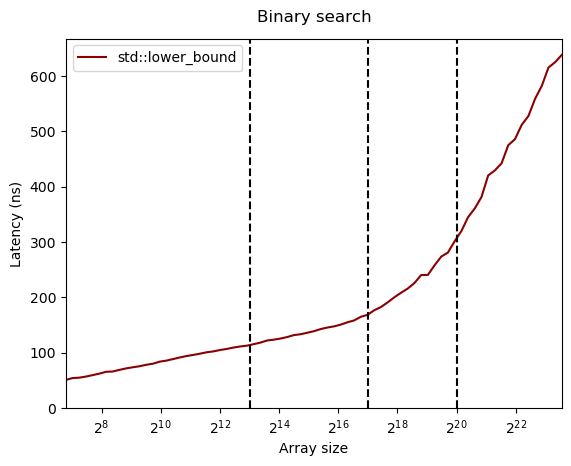

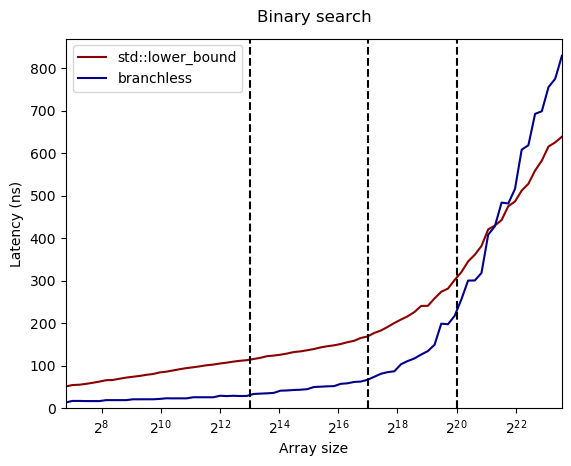

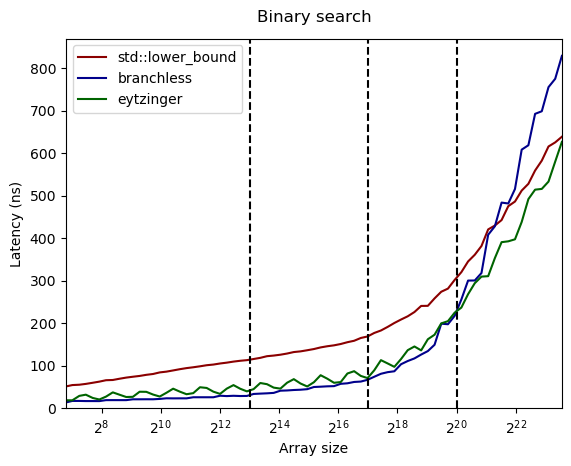

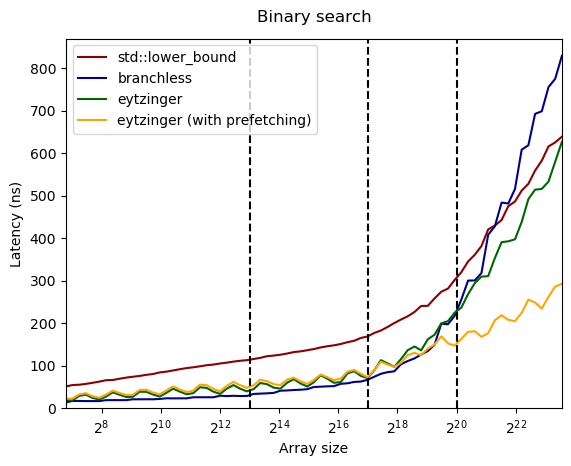

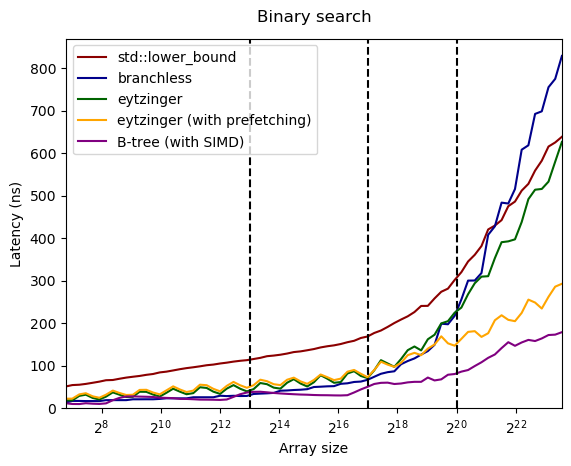

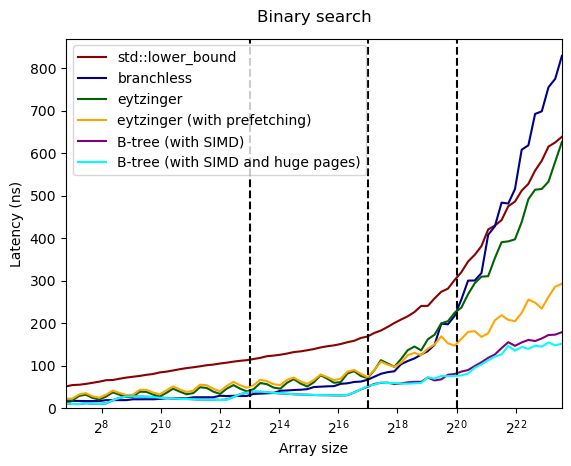

In [96]:
for i, current in enumerate(tasks):
    for (source, name, color), latencies in list(zip(tasks, results))[:i + 1]:
        plt.plot(ns, latencies, color=color, label=name)
    
    plot('Binary search', 'Latency (ns)', current[0] + '.svg', 1, legend=True)

In [110]:
btree_clang = [bench(n=n, q=2**22, source=source) for n in ns]

             btree 111     4194304 1067433874 9.66
             btree 129     4194304 2084202863 8.62
             btree 152     4194304 1650086489 8.44
             btree 177     4194304 1093987052 10.49
             btree 208     4194304  849577987 9.24
             btree 243     4194304 1842022031 8.69
             btree 284     4194304   24170984 10.11
             btree 333     4194304 1064724685 15.72
             btree 389     4194304 1049421536 20.9
             btree 456     4194304 1677787291 24.94
             btree 533     4194304 1381557454 25.05
             btree 624     4194304  485950239 23.54
             btree 730     4194304 1743435292 22.62
             btree 855     4194304 1980389118 21.65
             btree 1000    4194304  929098415 19.95
             btree 1170    4194304 1814983758 19.72
             btree 1369    4194304  683804919 19.48
             btree 1602    4194304  231941320 17.9
             btree 1874    4194304  926717548 18.01
             btree 

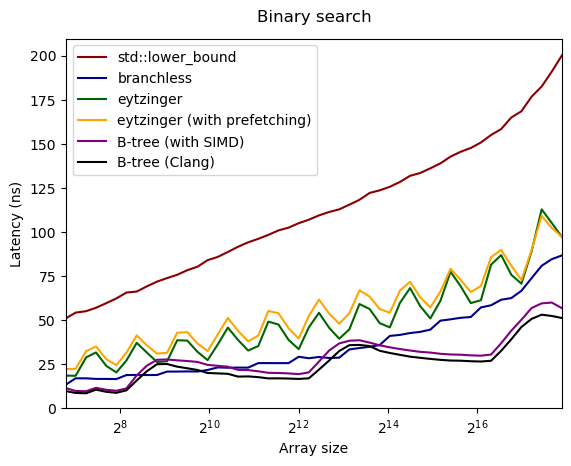

In [118]:
lim = 50
for (source, name, color), latencies in list(zip(tasks, results))[:-1]:
    plt.plot(ns[:lim], latencies[:lim], color=color, label=name)

plt.plot(ns[:lim], btree_clang[:lim], color='black', label='B-tree (Clang)')

plot('Binary search', 'Latency (ns)', 'mini.svg', legend=True)

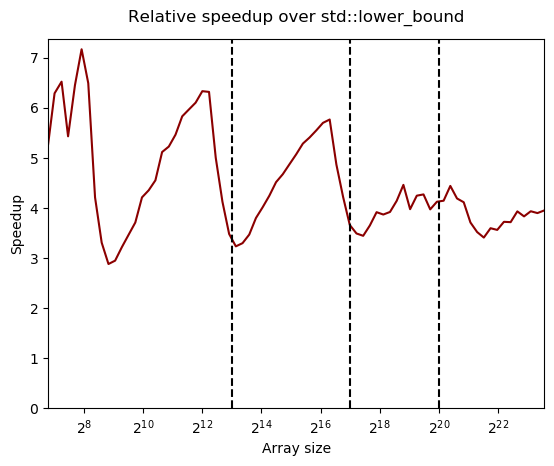

In [163]:
plt.plot(ns, [x / y for x, y in zip(results[0], btree_clang)], color='darkred')

plot('Relative speedup over std::lower_bound', 'Speedup', 'speedup.svg', ch=1)

In [108]:
bench(n=2**22, q=2**22, source='btree-hugepages')
bench(n=2**22, q=2**22, source='btree-unrolled')

   btree-hugepages 4194304 4194304  305940602 136.6
    btree-unrolled 4194304 4194304  305940602 143.17


143.17

In [169]:
bench(n=2**23, q=2**22, source='set')
bench(n=2**23, q=2**22, source='btree-hugepages')

               set 8388608 4194304  778587145 2162.75
   btree-hugepages 8388608 4194304  778587145 141.25


141.25

In [247]:
def crun(n=2**22, q=2**22, source='btree-unrolled'):
    !clang++ -std=c++17 -O3 -march=native -D N={n} {source}.cc -o run
    res = !./run {n} {q}
    duration = float(res[0].split()[0])
    check = int(res[1])
    print(f'{source:>18} {n:<7} {q:<7} {check:10} {duration}')
    return duration

In [251]:
n = 2**23
q = 2**20
x = bench(n, q, 'std')
#bench(n, q, 'btree-hugepages')
#y = crun(n, q, 'btree-branchless')
#y = crun(n, q, 'btree-unrolled')
#y = crun(n, q, 'btree-permuted')
y = crun(n, q, 'btree-optimized')
y = crun(n, q, 'bplus')
print(x / y)

               std 8388608 1048576   70931121 841.26
   btree-optimized 8388608 1048576   70931121 115.81
             bplus 8388608 1048576   70931121 88.11
9.547837929860401


In [253]:
1114144 / 2**20
8912944 / 2**23

1.0625057220458984

In [232]:
n = 256+16+2
q = 2**19
x = bench(n, q, 'std')
y = crun(n, q, 'bplus')
print(x / y)

               std 274     524288   956889340 64.44
             bplus 274     524288   956878098 9.2
7.004347826086957


In [188]:
n = 2**13
q = 2**23
crun(n, q, 'btree-optimized')

   btree-optimized 8192    8388608  675262810 26.45


26.45

In [152]:
ns2 = [1.5**k for k in range(12, 41)]
compiled = [crun(n) for n in ns2]

             btree 129.746337890625 4194304 2084202863 9.91
             btree 194.6195068359375 4194304 2083403023 10.85
             btree 291.92926025390625 4194304  762379633 12.87
             btree 437.8938903808594 4194304  339061474 27.09
             btree 656.8408355712891 4194304 1668497834 27.32
             btree 985.2612533569336 4194304  765465431 24.84
             btree 1477.8918800354004 4194304  280174820 22.78
             btree 2216.8378200531006 4194304 1071325533 20.34
             btree 3325.256730079651 4194304 1816977261 19.98
             btree 4987.885095119476 4194304 1287391303 21.2
             btree 7481.8276426792145 4194304  711446246 35.05
             btree 11222.741464018822 4194304  948639108 38.89
             btree 16834.112196028233 4194304 1143745151 35.48
             btree 25251.16829404235 4194304 2045496440 33.14
             btree 37876.75244106352 4194304 1369194400 31.74
             btree 56815.128661595285 4194304  109048632 30.52
    

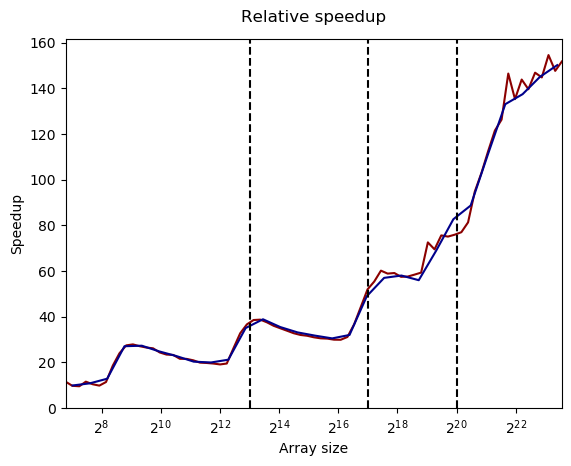

In [154]:
plt.plot(ns, results[-1], color='darkred')
plt.plot(ns2, compiled, color='darkblue')

plot('Relative speedup', 'Speedup', 'speedup-final.svg', ch=1)

In [ ]:
2->10
3->20
4->30